In [47]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('mssql+pyodbc://@(localdb)\Local/WebScrapping?driver=ODBC+Driver+17+for+SQL+Server')
consulta = "SELECT * FROM Notas"
df = pd.read_sql_query(consulta, engine)

In [3]:
df.describe()

,Codigo,Nombres,Modalidad,Prueba1,Prueba2,Prueba3,Acumulado,N,NV,NA,Notafinal,Ingreso,Observacion
count,5527,5527,5527,5455,5527,5455,5455,5527,589,589,5527,791,162
unique,5527,5527,9,3829,232,190,5036,4310,189,564,4317,30,3
top,10277E,CAMONES CHACALIAZA BRYAN ALFREDO,ORDINARIO,***,***,"1,000",***,***,"0,000",***,***,INGENIERÍA CIVIL,Reglamento de Admisión: cuarta disposición final
freq,1,1,5344,109,109,165,109,109,15,10,109,81,109


In [4]:
df

,Codigo,Nombres,Modalidad,Prueba1,Prueba2,Prueba3,Acumulado,N,NV,NA,Notafinal,Ingreso,Observacion
0,10277E,CAMONES CHACALIAZA BRYAN ALFREDO,ORDINARIO,"443,880","318,000","142,500","904,380","9,803",None,None,"9,803",None,None
1,10278J,FLORENTINO OCAÑA KAMILLA ISABEL,ORDINARIO,***,***,***,***,***,None,None,***,None,Reglamento de Admisión: cuarta disposición final
2,10279D,CÁRDENAS CHÁVEZ KATHERINE LUCÍA,ORDINARIO,"490,320","330,000","210,000","1030,320","11,168",None,None,"11,168",INGENIERÍA QUÍMICA,None
3,10280G,TARAPAQUI MEDINA ERIKA MERCEDES,ORDINARIO,"348,400","177,000","165,000","690,400","7,484",None,None,"7,484",None,None
4,10281A,MASGO ROBERTO ERICKA,ORDINARIO,"479,600","453,000","400,000","1332,600","14,445",None,None,"14,445",INGENIERÍA QUÍMICA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,98074A,CASTILLO RAMOS DIEGO JOSÉ,ORDINARIO,"390,080","207,000","1,000","598,080","6,483",None,None,"6,483",None,None
5523,98075A,ARIAS VASQUEZ ANTHONY JAYL EUFRACIO,ORDINARIO,"477,400","222,000","125,000","824,400","8,936",None,None,"8,936",None,None
5524,98076A,ROMANI BOCANEGRA JOSÉ MIGUEL,ORDINARIO,"170,000","72,000","1,000","243,000","2,634",None,None,"2,634",None,None
5525,98077A,OSCATA VILLEGAS ANDERSON,EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE ...,"0,000","1,000","35,000","36,000","0,390",None,None,"0,390",None,None


In [5]:
nuevo_df = df[df['Notafinal'] != '***']

In [6]:
def Clean(df,cols):
    for col in cols:
        df[col]=df[col].str.replace(',','.')
        df_numeric = df[col].apply(pd.to_numeric, errors='coerce')

        # Identificar valores no numéricos
        valores_no_numericos = df[col][df_numeric.isnull()]

        print(f'{col} : {valores_no_numericos.unique().tolist()}')
        df[col]=df_numeric

In [7]:
Numeric_cols=['Prueba1','Prueba2','Prueba3','N','NV','NA','Acumulado','Notafinal']
Clean(nuevo_df,Numeric_cols)


C:\Users\seec5\AppData\Local\Temp\ipykernel_8396\3284908504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace(',','.')
C:\Users\seec5\AppData\Local\Temp\ipykernel_8396\3284908504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df_numeric


Prueba1 : [None]
Prueba2 : []
Prueba3 : [None]
N : []
NV : [None]
NA : [None]
Acumulado : [None]
Notafinal : []


In [8]:
nuevo_df[Numeric_cols].describe()

,Prueba1,Prueba2,Prueba3,N,NV,NA,Acumulado,Notafinal
count,5346.000000,5418.000000,5346.000000,5418.000000,579.000000,579.000000,5346.000000,5418.000000
mean,399.414852,212.212255,150.302095,8.258391,9.475648,8.104527,759.156154,8.321122
std,109.097293,126.458309,108.511392,3.272323,3.369586,2.789679,297.669120,3.238126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,341.320000,114.000000,65.000000,5.846500,7.560000,6.273000,539.170000,5.955000
50%,414.220000,204.000000,130.000000,8.131000,9.960000,8.105000,748.270000,8.227000
75%,474.890000,300.000000,220.000000,10.585500,11.760000,10.199500,973.410000,10.626750
max,676.120000,776.000000,500.000000,19.400000,16.560000,14.157000,1743.120000,19.400000


In [9]:
nuevo_df.Ingreso.unique().tolist()

[None,
 'INGENIERÍA QUÍMICA',
 'INGENIERÍA PETROQUÍMICA',
 'QUÍMICA',
 'INGENIERÍA TEXTIL',
 'INGENIERÍA ELÉCTRICA',
 'INGENIERÍA FÍSICA',
 'INGENIERÍA DE TELECOMUNICACIONES',
 'INGENIERÍA DE CIBERSEGURIDAD',
 'FÍSICA',
 'INGENIERÍA ELECTRÓNICA',
 'INGENIERÍA AMBIENTAL',
 'INGENIERÍA METALÚRGICA',
 'MATEMÁTICA',
 'INGENIERÍA DE HIGIENE Y SEGURIDAD INDUSTRIAL',
 'INGENIERÍA ESTADÍSTICA',
 'INGENIERÍA INDUSTRIAL',
 'INGENIERÍA DE SOFTWARE',
 'INGENIERÍA DE SISTEMAS',
 'INGENIERÍA ECONÓMICA',
 'CIENCIA DE LA COMPUTACIÓN',
 'INGENIERÍA CIVIL',
 'INGENIERÍA SANITARIA',
 'INGENIERÍA DE PETRÓLEO Y GAS NATURAL',
 'INGENIERÍA GEOLÓGICA',
 'ARQUITECTURA',
 'INGENIERÍA NAVAL',
 'INGENIERÍA MECÁNICA-ELÉCTRICA',
 'INGENIERÍA MECATRÓNICA',
 'INGENIERÍA DE MINAS',
 'INGENIERÍA MECÁNICA']

In [10]:
Ingreso_df=nuevo_df[nuevo_df.Ingreso.notna()]
Ingreso_df[Numeric_cols].describe()

,Prueba1,Prueba2,Prueba3,N,NV,NA,Acumulado,Notafinal
count,758.000000,791.000000,758.000000,791.000000,40.000000,40.000000,758.000000,791.000000
mean,505.825435,390.742099,311.787599,13.074661,13.045000,12.718775,1199.851821,13.081699
std,58.531928,90.994654,80.988692,1.824428,1.626125,0.863101,157.420542,1.816634
min,281.960000,132.000000,60.000000,10.002000,10.320000,10.686000,922.760000,10.002000
25%,467.220000,330.000000,255.000000,11.703500,11.900000,12.357500,1081.120000,11.758000
50%,506.140000,387.000000,318.750000,12.989000,13.260000,12.775500,1196.640000,12.977000
75%,545.920000,441.000000,367.500000,14.144000,14.230000,13.349500,1298.595000,14.139500
max,676.120000,776.000000,500.000000,19.400000,16.560000,14.157000,1743.120000,19.400000


In [39]:
Ingreso_df_stats = Ingreso_df.groupby('Ingreso')[Numeric_cols].agg(['mean','min','max'])
Ingreso_df_stats.columns = Ingreso_df_stats.columns.map('_'.join)
# .sort_values(by='Notafinal',ascending=False)


In [40]:
Ingreso_df_stats

,Prueba1_mean,Prueba1_min,Prueba1_max,Prueba2_mean,Prueba2_min,Prueba2_max,Prueba3_mean,Prueba3_min,Prueba3_max,N_mean,...,NV_max,NA_mean,NA_min,NA_max,Acumulado_mean,Acumulado_min,Acumulado_max,Notafinal_mean,Notafinal_min,Notafinal_max
Ingreso,,,,,,,,,,,,,,,,,,,,,
ARQUITECTURA,511.746667,416.00,623.44,365.750000,246.0,468.0,288.653846,155.0,425.0,12.579600,...,16.56,12.718775,10.686,14.157,1164.246667,984.56,1385.44,12.718775,10.686,14.157
CIENCIA DE LA COMPUTACIÓN,509.395000,415.92,613.16,364.529412,228.0,567.0,287.656250,112.5,440.0,12.549412,...,NaN,NaN,NaN,NaN,1149.363750,1013.32,1543.02,12.549412,10.984,16.726
FÍSICA,521.237647,402.88,673.48,397.611111,231.0,752.0,329.852941,215.0,500.0,13.614611,...,NaN,NaN,NaN,NaN,1227.855294,1056.78,1737.48,13.614611,11.455,18.834
INGENIERÍA AMBIENTAL,477.496000,323.60,619.48,311.040000,156.0,510.0,252.200000,130.0,425.0,11.281240,...,NaN,NaN,NaN,NaN,1040.736000,927.60,1554.48,11.281240,10.055,16.850
INGENIERÍA CIVIL,534.009315,389.76,676.12,468.419753,306.0,756.0,370.582192,197.5,485.0,14.756580,...,NaN,NaN,NaN,NaN,1358.372329,1071.44,1743.12,14.756580,11.200,18.900
INGENIERÍA DE CIBERSEGURIDAD,502.779130,379.12,646.28,389.086957,285.0,564.0,310.108696,207.5,500.0,13.029087,...,NaN,NaN,NaN,NaN,1201.974783,1057.60,1710.28,13.029087,11.464,18.539
INGENIERÍA DE HIGIENE Y SEGURIDAD INDUSTRIAL,494.310303,426.32,591.32,371.272727,237.0,465.0,310.454545,187.5,365.0,12.747818,...,NaN,NaN,NaN,NaN,1176.037576,1147.64,1198.76,12.747818,12.440,12.994
INGENIERÍA DE MINAS,483.280000,322.60,614.96,406.045455,321.0,572.0,301.309524,177.5,422.5,12.887591,...,NaN,NaN,NaN,NaN,1182.732381,944.62,1366.94,12.887591,10.239,14.817
INGENIERÍA DE PETRÓLEO Y GAS NATURAL,533.840000,533.84,533.84,381.000000,381.0,381.0,217.500000,217.5,217.5,12.274000,...,NaN,NaN,NaN,NaN,1132.340000,1132.34,1132.34,12.274000,12.274,12.274


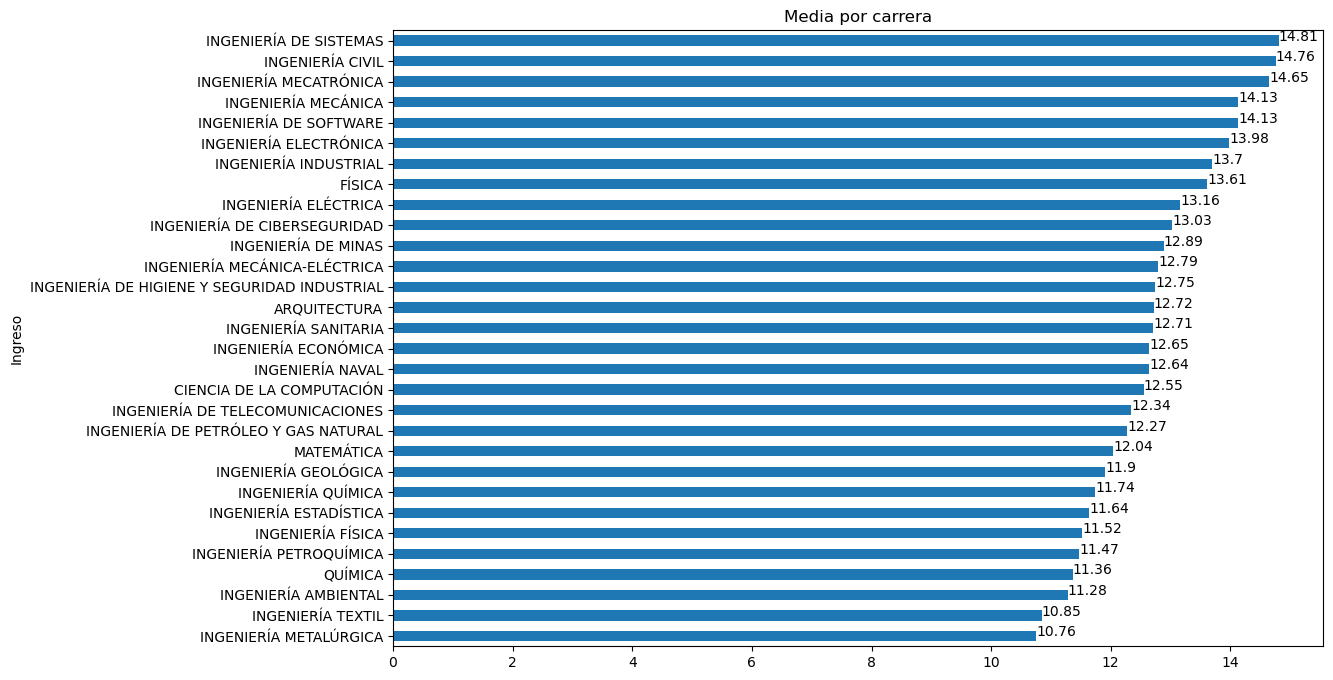

In [53]:
Ingreso_df_stats.sort_values(by='Notafinal_mean')['Notafinal_mean'].plot(kind='barh',figsize=(12,8),title="Media por carrera")
for index, value in enumerate(Ingreso_df_stats.sort_values(by='Notafinal_mean')['Notafinal_mean']):
    plt.text(value, index, str(round(value, 2)))
    

{'whiskers': [<matplotlib.lines.Line2D at 0x26696050b80>,
 'caps': [<matplotlib.lines.Line2D at 0x26696048160>,
 'boxes': [<matplotlib.lines.Line2D at 0x266960508b0>,
 'medians': [<matplotlib.lines.Line2D at 0x26696048700>,
 'fliers': [<matplotlib.lines.Line2D at 0x266960489d0>,
 'means': []}

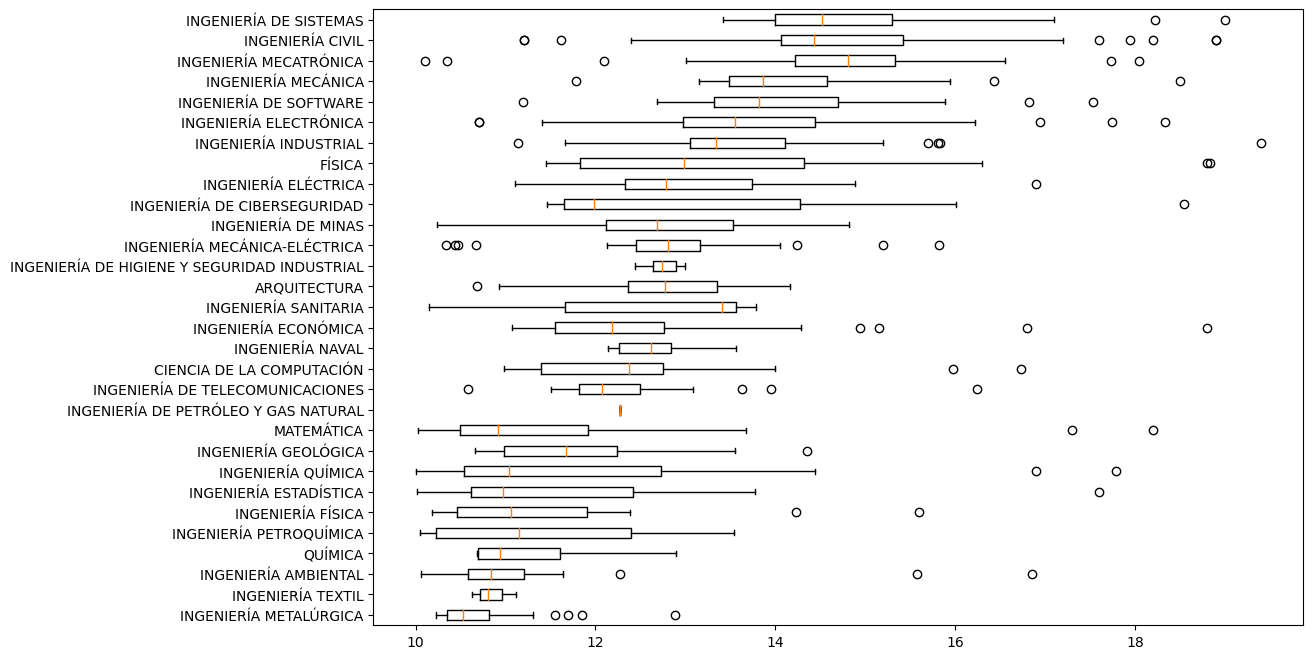

In [71]:
stats_por_carrera = Ingreso_df.groupby('Ingreso')['Notafinal'].describe()

stats_por_carrera = Ingreso_df.groupby('Ingreso')['Notafinal'].mean().reset_index()

stats_por_carrera = stats_por_carrera.sort_values(by='Notafinal')

data_vf = [Ingreso_df[Ingreso_df['Ingreso'] == Ingreso]['Notafinal'] for Ingreso in stats_por_carrera['Ingreso']]

# Generar el diagrama de velas por carrera
plt.figure(figsize=(12,8))
plt.boxplot(data_vf, vert=False, labels=stats_por_carrera['Ingreso'])

